<a href="https://colab.research.google.com/github/krishnaD2003/CNN_number_pred_application/blob/main/CNN_MNIST_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers ,models
import matplotlib.pyplot as plt


In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
#normalize the data (0 - 1) # [0-255] ------> [0 - 1]

x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# reshape, include the channels

x_train =   x_train.reshape(-1,28,28,1)

x_test =   x_test.reshape(-1,28,28,1)

In [ ]:
#Build the CNN model


model = models.Sequential([ layers.Conv2D(32,(3,3),activation='relu',input_shape = (28,28,1)),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(64,(3,3),activation='relu'),
                            layers.MaxPooling2D((2,2)),
                            layers.Flatten(),
                            layers.Dense(64,activation='relu'),
                            layers.Dense(10,activation='softmax')])

#compile the model


model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Training

model.fit(x_train,y_train, epochs = 5,validation_data=(x_test,y_test))
test_loss,test_acc = model.evaluate(x_test,y_test)

print(f'Test accuracy : {test_acc: .4f}')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9030 - loss: 0.3122 - val_accuracy: 0.9829 - val_loss: 0.0497
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9855 - loss: 0.0477 - val_accuracy: 0.9853 - val_loss: 0.0460
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9893 - loss: 0.0312 - val_accuracy: 0.9908 - val_loss: 0.0304
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9932 - loss: 0.0219 - val_accuracy: 0.9880 - val_loss: 0.0408
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9954 - loss: 0.0151 - val_accuracy: 0.9911 - val_loss: 0.0277
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9881 - loss: 0.0373
Test accuracy :  0.9911


In [ ]:
#Loading an image

from PIL import Image
import numpy as np

In [ ]:
img =  Image.open('ima_9.png').convert('L')
img =  img.resize((28,28))
img_array = np.array(img)
img_array = img_array - 255

img_array = img_array/255

input_data =  img_array.reshape(1,28,28,1)

pred =  model.predict(input_data)

np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


np.int64(7)

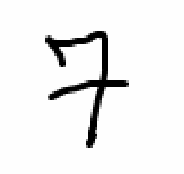

In [ ]:
img =  Image.open('ima6.png').convert('L')
img

In [ ]:
pred =  model.predict(input_data)

np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


np.int64(6)